### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd


water = pd.read_csv("data/water.csv", index_col=0)
water

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


### 2. Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


### 3. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [2]:
water_south = water[water['location'] == 'South']
water_north = water[water['location'] == 'North']

Text(0.5, 0.98, 'Корреляция между hardness и mortality')

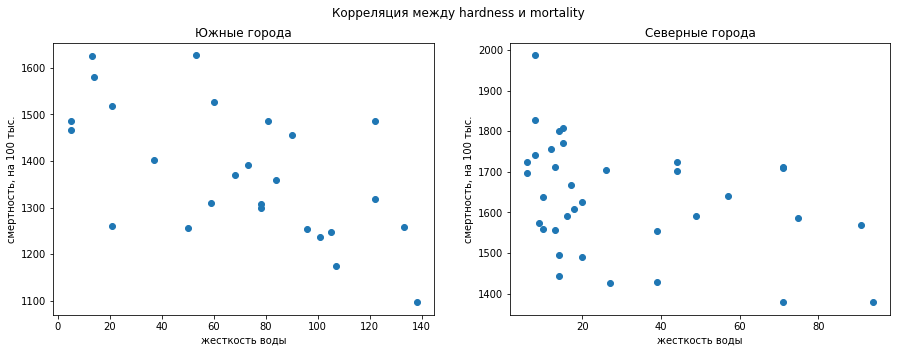

In [3]:
import matplotlib.pyplot as plt


fig, [ax0, ax1] = plt.subplots(1,2, figsize=(15,5))
ax0.scatter(y=water_south['mortality'], x=water_south['hardness'])
ax1.scatter(y=water_north['mortality'], x=water_north['hardness'])

xlabel = 'жесткость воды'
ylabel = 'смертность, на 100 тыс.'


ax0.set_xlabel(xlabel)
ax0.set_ylabel(ylabel)
ax0.set_title('Южные города')
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_title('Северные города')

plt.suptitle("Корреляция между hardness и mortality")

In [4]:
# коэффициенты корреляции
def correlations(df, location):
    pearson = df.corr(method='pearson').loc['hardness', 'mortality'].round(4)
    spearman = df.corr(method='spearman').loc['hardness', 'mortality'].round(4)
    
    print(f'Коэффициенты корреляции для городов {location}а. Пирсон: {pearson}, Спирмен: {spearman}')
#     return pearson, spearman

correlations(water_south, "Юг")
correlations(water_north, "Север")


Коэффициенты корреляции для городов Юга. Пирсон: -0.6022, Спирмен: -0.5957
Коэффициенты корреляции для городов Севера. Пирсон: -0.3686, Спирмен: -0.4042


### Модель линейной регресси

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression(df, location, test_size=0.30):
    X = df[['hardness']]
    y = df['mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    coef = model.coef_[0].round(2)
    intercept = model.intercept_.round(2)
    determination = model.score(X_test, y_test).round(4)
    
    print(f'Линейная регрессии для городов {location}а')
    print(f'Модель линейной регрессии: y = {coef}*x + {intercept}')
    print(f'Коэффициент детерминации: {determination}')
    
    return model

# набор данных не большой, поэтому оставим под тестовые данные 10%
model_south = linear_regression(water_south, "Юг", test_size=0.10)
model_north = linear_regression(water_north, "Север", test_size=0.10)

Линейная регрессии для городов Юга
Модель линейной регрессии: y = -2.16*x + 1529.14
Коэффициент детерминации: 0.7724
Линейная регрессии для городов Севера
Модель линейной регрессии: y = -1.82*x + 1687.71
Коэффициент детерминации: 0.0323


Text(0.5, 0.98, 'Качество регрессии / визуализация остатков')

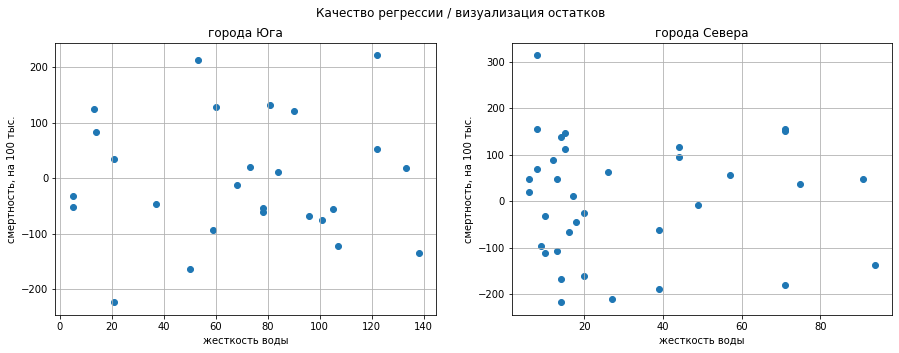

In [6]:
def data_for_residuals(model, df):
    X = df[['hardness']]
    y = df['mortality']
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    return X, residuals

def draw_residuals(model, df, location, ax):
    X, residuals = data_for_residuals(model, df)
    ax.scatter(X, residuals)
    xlabel = 'жесткость воды'
    ylabel = 'смертность, на 100 тыс.'


    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'города {location}а')
    ax.grid(True)

    
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(15,5))

draw_residuals(model_south, water_south, "Юг", ax0)
draw_residuals(model_north, water_north, "Север", ax1)

plt.suptitle("Качество регрессии / визуализация остатков")

## Результаты и выводы

**Результаты**  

|локация|коэффициент Пирсона|коэффициент Спирмена|модель линейной регрессии|коэффициент детерминации|
|-|-|-|-|-|
|Юг|-0.6022|-0.5957|y = -2.16*x + 1529.14|0.7724|
|Север|-0.3686|-0.4042|y = -1.82*x + 1687.71|0.0323|

**Выводы**:
1. города Юга:  
    * Заметная (?) отрицательная корреляция между жесткостью воды и смертностью  
    * Модель линейной регрессии имеет высокий коэффициент детерминации, что говорит о хорошем качестве модели
2. города Сервера:  
    * Корреляция не такая сильная  
    * Качество модели линейной регрессии низкое. Это видно:  
         * коэффициент детерминации около 0  
         * на визулизации остатков виден выброс  
